In [1]:
# pip install tueplots

In [2]:
# from tueplots import bundles, axes
# plt.rcParams.update({"figure.dpi": 150})

In [3]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
from utils.data_generator import DataGenerator
from utils.myutils import Utils
import matplotlib.pyplot as plt
import random
import json
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr

sns.set_theme(rc={"figure.dpi": 100, "figure.figsize": (6, 3.75)})
utils = Utils()
import time

2023-12-08 04:18:34.395604: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 04:18:34.444814: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
df = pd.read_json(
    "experiments/complete/adbench/standard/002_adbench_vs_gplvm_aucroc_contaminated.json"
)
df.head(5)

,IForest,KNN,CBLOF,PCA,ECOD,GPLVM
0,0.496581,0.557006,0.523200,0.530072,0.512396,0.528844
1,0.826387,0.791137,0.700228,0.692759,0.803716,0.646609
2,0.737342,0.794484,0.812179,0.765127,0.830822,0.829236
3,0.979938,0.950617,0.952787,0.955392,0.987365,0.958767
4,0.696507,0.730743,0.722589,0.724840,0.745071,0.717480


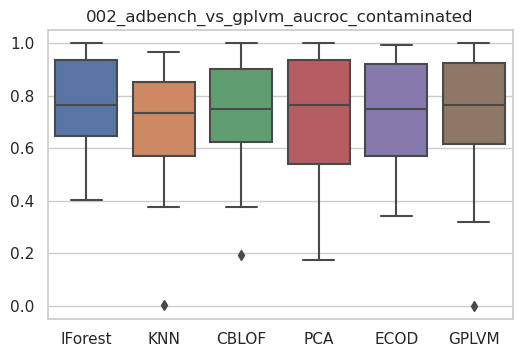

In [5]:
sns.set_style("whitegrid")
s = sns.boxplot(data=df)
s.set_title("002_adbench_vs_gplvm_aucroc_contaminated")
None
# plt.savefig(
#    "experiments/complete/adbench/standard/002_adbench_vs_gplvm_aucroc_normal.jpg"
# )

In [6]:
base = "experiments/complete/adbench/duplicate_anomalies/"


def save_experiment_boxplot(base_path):
    for path in os.listdir(base_path):
        if path.endswith("json"):
            plt.figure()
            df = pd.read_json(base + path)
            s = sns.boxplot(data=df)
            img = path.replace(".json", ".png")
            title = path.replace(".json", "")
            s.set_title(title)
            plt.savefig(base + "images/" + img)


# save_experiment_boxplot(base)

# Anomalias Duplicadas

In [7]:
base = "experiments/complete/adbench/duplicate_anomalies/"
list_dict = []
dict_exp = {}
df_result = pd.DataFrame(data=None)
for path in os.listdir(base):
    if path.endswith("json"):
        with open(base + path, "r") as file:
            exp = json.load(file)
            exp = pd.DataFrame(exp).mean(axis=0).to_dict()
            dict_exp = {path.replace("ad_vs_gp_", "").replace(".json", ""): exp}
            df = pd.DataFrame(dict_exp).T
            df_result = pd.concat([df_result, df])

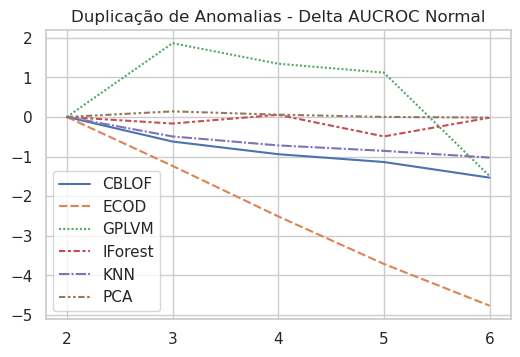

In [8]:
df_normal_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_normal_2",
            "aucroc_normal_3",
            "aucroc_normal_4",
            "aucroc_normal_5",
            "aucroc_normal_6",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_normal_2": "2",
        "aucroc_normal_3": "3",
        "aucroc_normal_4": "4",
        "aucroc_normal_5": "5",
        "aucroc_normal_6": "6",
    }
)
df_normal_aucroc_delta = df_normal_aucroc.subtract(df_normal_aucroc.iloc[0, :]) * 100
s = sns.lineplot(df_normal_aucroc_delta)
s.set_title("Duplicação de Anomalias - Delta AUCROC Normal")
None

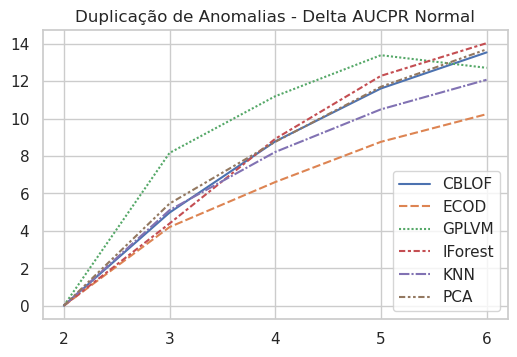

In [9]:
df_normal_aucpr = df_result.loc[
    df_result.index.isin(
        [
            "aucpr_normal_2",
            "aucpr_normal_3",
            "aucpr_normal_4",
            "aucpr_normal_5",
            "aucpr_normal_6",
        ]
    ),
    :,
].rename(
    index={
        "aucpr_normal_2": "2",
        "aucpr_normal_3": "3",
        "aucpr_normal_4": "4",
        "aucpr_normal_5": "5",
        "aucpr_normal_6": "6",
    }
)
df_normal_aucpr_delta = df_normal_aucpr.subtract(df_normal_aucpr.iloc[0, :]) * 100
s = sns.lineplot(df_normal_aucpr_delta)
s.set_title("Duplicação de Anomalias - Delta AUCPR Normal")
None

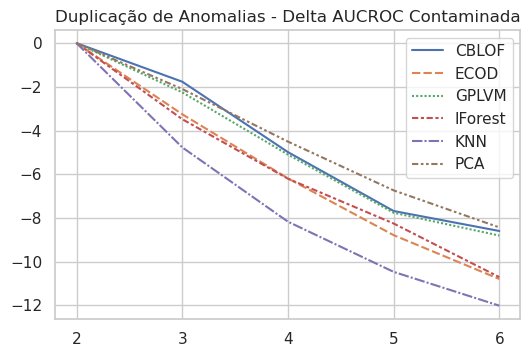

In [10]:
df_contaminated_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_contaminated_2",
            "aucroc_contaminated_3",
            "aucroc_contaminated_4",
            "aucroc_contaminated_5",
            "aucroc_contaminated_6",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_contaminated_2": "2",
        "aucroc_contaminated_3": "3",
        "aucroc_contaminated_4": "4",
        "aucroc_contaminated_5": "5",
        "aucroc_contaminated_6": "6",
    }
)
df_contaminated_aucroc_delta = (
    df_contaminated_aucroc.subtract(df_contaminated_aucroc.iloc[0, :]) * 100
)
s = sns.lineplot(df_contaminated_aucroc_delta)
s.set_title("Duplicação de Anomalias - Delta AUCROC Contaminada")
None

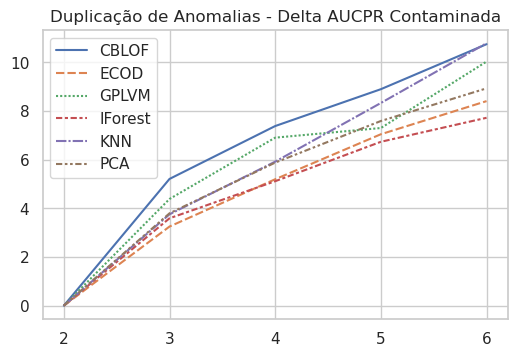

In [11]:
df_contaminated_aucpr = df_result.loc[
    df_result.index.isin(
        [
            "aucpr_contaminated_2",
            "aucpr_contaminated_3",
            "aucpr_contaminated_4",
            "aucpr_contaminated_5",
            "aucpr_contaminated_6",
        ]
    ),
    :,
].rename(
    index={
        "aucpr_contaminated_2": "2",
        "aucpr_contaminated_3": "3",
        "aucpr_contaminated_4": "4",
        "aucpr_contaminated_5": "5",
        "aucpr_contaminated_6": "6",
    }
)
df_contaminated_aucpr_delta = (
    df_contaminated_aucpr.subtract(df_contaminated_aucpr.iloc[0, :]) * 100
)
s = sns.lineplot(df_contaminated_aucpr_delta)
s.set_title("Duplicação de Anomalias - Delta AUCPR Contaminada")
None

# Features Irrelevantes

In [12]:
base = "experiments/complete/adbench/irrelevant_features/"
list_dict = []
dict_exp = {}
df_result = pd.DataFrame(data=None)
for path in os.listdir(base):
    if path.endswith("json"):
        with open(base + path, "r") as file:
            exp = json.load(file)
            exp = pd.DataFrame(exp).mean(axis=0).to_dict()
            dict_exp = {path.replace("ad_vs_gp_", "").replace(".json", ""): exp}
            df = pd.DataFrame(dict_exp).T
            df_result = pd.concat([df_result, df])

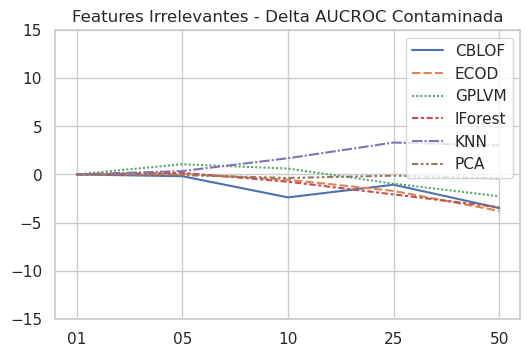

In [13]:
df_contaminated_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_contaminated_1",
            "aucroc_contaminated_5",
            "aucroc_contaminated_10",
            "aucroc_contaminated_25",
            "aucroc_contaminated_50",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_contaminated_1": "01",
        "aucroc_contaminated_5": "05",
        "aucroc_contaminated_10": "10",
        "aucroc_contaminated_25": "25",
        "aucroc_contaminated_50": "50",
    }
)
df_contaminated_aucroc_delta = (
    df_contaminated_aucroc.sort_index().subtract(df_contaminated_aucroc.iloc[0, :])
    * 100
)
s = sns.lineplot(df_contaminated_aucroc_delta)
s.set_ylim([-15, 15])
s.set_title("Features Irrelevantes - Delta AUCROC Contaminada")
None

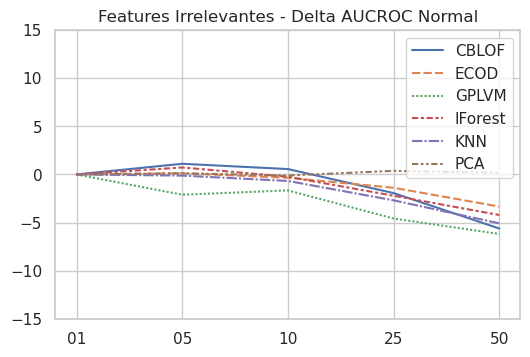

In [14]:
df_normal_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_normal_1",
            "aucroc_normal_5",
            "aucroc_normal_10",
            "aucroc_normal_25",
            "aucroc_normal_50",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_normal_1": "01",
        "aucroc_normal_5": "05",
        "aucroc_normal_10": "10",
        "aucroc_normal_25": "25",
        "aucroc_normal_50": "50",
    }
)
df_normal_aucroc_delta = (
    df_normal_aucroc.sort_index().subtract(df_normal_aucroc.iloc[0, :]) * 100
)
s = sns.lineplot(df_normal_aucroc_delta)
s.set_ylim([-15, 15])
s.set_title("Features Irrelevantes - Delta AUCROC Normal")
None

# Epochs

In [37]:
df_5000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_5000.json"
).rename(columns={"GPLVM": "GPLVM_5000"})
#df_1000 = pd.read_json("experiments/complete/gplvm/001_gplvm_contaminated.json")[
#    ["test_auc_roc"]
#].rename(columns={"test_auc_roc": "GPLVM_1000"})
df_1000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_1000.json"
).rename(columns={"GPLVM": "GPLVM_1000"})
df_0100 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_100.json"
).rename(columns={"GPLVM": "GPLVM_100"})

FileNotFoundError: File experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_1000.json does not exist

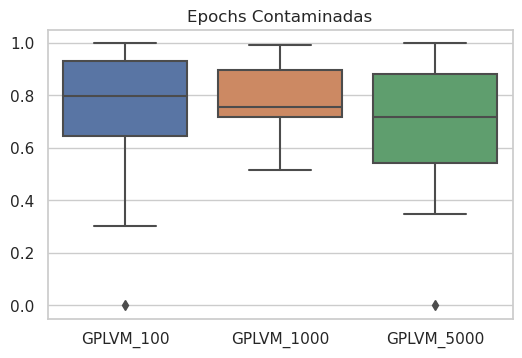

In [38]:
s = sns.boxplot(pd.concat([df_0100, df_1000, df_5000], axis=1))
s.set_title("Epochs Contaminadas")
None

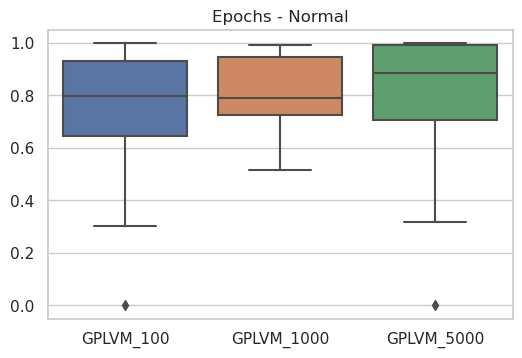

In [41]:
df_5000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_5000.json"
).rename(columns={"GPLVM": "GPLVM_5000"})
df_1000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_1000.json"
).rename(columns={"GPLVM": "GPLVM_1000"})
df_0100 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_100.json"
).rename(columns={"GPLVM": "GPLVM_100"})
#df_1000 = pd.read_json("experiments/complete/gplvm/000_gplvm_normal_03_best.json")[
#    ["test_auc_roc"]
#].rename(columns={"test_auc_roc": "GPLVM_1000"})
s = sns.boxplot(pd.concat([df_0100, df_1000, df_5000], axis=1))
s.set_title("Epochs - Normal")
None

# LOE (ENFIM)

In [42]:
df_loe = utils.read_json_from_folder("experiments/complete/loe/")

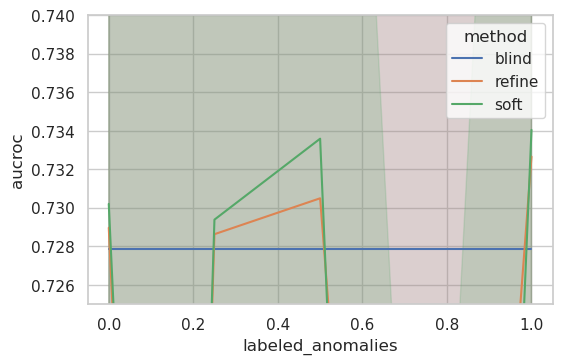

In [43]:
s = sns.lineplot(
    data=df_loe,
    x="labeled_anomalies",
    y="aucroc",
    hue="method",
)
s.set_ylim(0.725, 0.74)
None

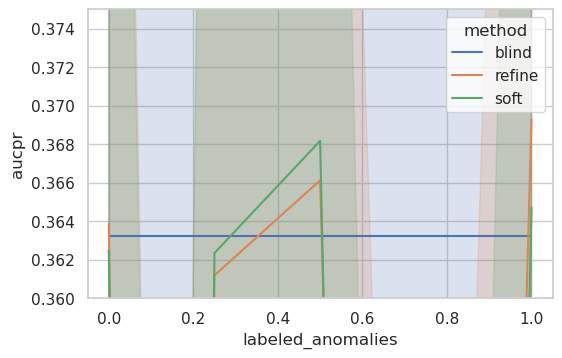

In [44]:
s = sns.lineplot(
    data=df_loe,
    x="labeled_anomalies",
    y="aucpr",
    hue="method",
)
s.set_ylim(0.36, 0.375)
None